# TÜİK Trafiğe Kayıtlı Otomobillerin Yakıt Cinsine Göre Dağılımı
**Türkiye İstatistik Kurumu tarafından 2004 - 2022 yılları arasında araçların kullandıkları yakıtlara göre dağılım excel dosyasını TÜİK raporlarından temin ettim ve keşifsel veri analizi yaptım.**

# İlk olarak kullanacağımız kütüphaneleri ekliyoruz.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
arac_df = pd.read_excel("yakıt-araç.xls")

In [ ]:
arac_df

,"Trafiğe kayıtlı otomobillerin yakıt cinsine göre dağılımı, 2004 - 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Distribution of cars registered to the traffic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yıl,Toplam,Benzin,NaN,Dizel,NaN,LPG,NaN,Hibrit (2),NaN,Elektrik,NaN,Bilinmeyen (3),NaN
2,Year,Total,Gasoline,(%),Diesel,(%),LPG,(%),Hybrid (2),(%),Electric,(%),Unknown (3),(%)
3,2004,5400440,4062486,75.225093,252629,4.677934,793081,14.685489,-,-,-,-,292244,5.411485
4,2005,5772745,3883101,67.26611,394617,6.835864,1259327,21.815046,-,-,-,-,235700,4.08298
5,2006,6140992,3838598,62.507784,583794,9.50651,1522790,24.797134,-,-,-,-,195810,3.188573
6,2007,6472156,3714973,57.399312,763946,11.803578,1826126,28.215111,-,-,-,-,167111,2.581999
7,2008,6796629,3531763,51.963451,947727,13.944074,2214661,32.584698,-,-,-,-,102478,1.507777
8,2009,7093964,3373875,47.559799,1111822,15.672789,2525449,35.599969,-,-,-,-,82818,1.167443
9,2010,7544871,3191964,42.306409,1381631,18.312189,2900034,38.437158,-,-,-,-,71242,0.944244


# Gördüğümüz gibi verimiz excel verisi olduğu için çok karışık ve düzenlenmesi gerekiyor.

In [ ]:
df = arac_df.copy()

1. Verimizdeki elektrik ve hybrid diye tabir edilen sütunlerin belli tarihe kadar olanlarında veri girişi olmamıştır. Onları veriden atmak yerine o zamanki verileri sıfır (0) diye kabul ettim. <br>
2. Tarih sütunümüzde daha sonra bize sorun çıkartabilecek olan bir veriyi düzelttim.

In [ ]:
df = df.replace({"-": 0, "2022 (1)":"2022" })

In [ ]:
df.head()

,"Trafiğe kayıtlı otomobillerin yakıt cinsine göre dağılımı, 2004 - 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Distribution of cars registered to the traffic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yıl,Toplam,Benzin,NaN,Dizel,NaN,LPG,NaN,Hibrit (2),NaN,Elektrik,NaN,Bilinmeyen (3),NaN
2,Year,Total,Gasoline,(%),Diesel,(%),LPG,(%),Hybrid (2),(%),Electric,(%),Unknown (3),(%)
3,2004,5400440,4062486,75.225093,252629,4.677934,793081,14.685489,0,0,0,0,292244,5.411485
4,2005,5772745,3883101,67.26611,394617,6.835864,1259327,21.815046,0,0,0,0,235700,4.08298


In [ ]:
df.isnull().sum()

Trafiğe kayıtlı otomobillerin yakıt cinsine göre dağılımı, 2004 - 2022     0
Unnamed: 1                                                                13
Unnamed: 2                                                                13
Unnamed: 3                                                                14
Unnamed: 4                                                                13
Unnamed: 5                                                                14
Unnamed: 6                                                                13
Unnamed: 7                                                                14
Unnamed: 8                                                                13
Unnamed: 9                                                                14
Unnamed: 10                                                               13
Unnamed: 11                                                               14
Unnamed: 12                                                               13

## Verimizdeki boş verilerimize baktım. Boş verilerin excel tabanlı bir veriseti olduğundan kaynaklı önemsiz yerlerde olduğunun kanısına vararak boş verileri veri setinden çıkarttım.

In [ ]:
df.dropna(inplace=True)

# Sütun isimlendirmelerini yeniden yaptıktan sonra, indexleri resetledim, tarih sütununu yeni verimin indexi haline getirdim daha sonra görselleştirme çalışmalarım için yararı olacak.

In [ ]:
df = df.rename(columns ={"Trafiğe kayıtlı otomobillerin yakıt cinsine göre dağılımı, 2004 - 2022":"Year",
                        "Unnamed: 1":"Total",
                        "Unnamed: 2":"Gasoline",
                        "Unnamed: 3":"Gasoline %",
                        "Unnamed: 4":"Diesel",
                        "Unnamed: 5":"Diesel %",
                        "Unnamed: 6":"LPG",
                        "Unnamed: 7":"LPG %",
                        "Unnamed: 8":"Hybrid",
                        "Unnamed: 9":"Hybrid %",
                        "Unnamed: 10":"Electric",
                        "Unnamed: 11":"Electric %",
                        "Unnamed: 12":"Unknown",
                        "Unnamed: 13":"Unknow %"})

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.drop(0, axis=0, inplace=True)

In [ ]:
df.set_index("Year", inplace=True)

In [ ]:
# Verimizin son hali bir şekildedir. İlk veriyi farklı bir isimle kayıt ettim çünkü ham verimi değiştirmek istemiyorum.
df

,Total,Gasoline,Gasoline %,Diesel,Diesel %,LPG,LPG %,Hybrid,Hybrid %,Electric,Electric %,Unknown,Unknow %
Year,,,,,,,,,,,,,
2004,5400440,4062486,75.225093,252629,4.677934,793081,14.685489,0,0.000000,0,0.000000,292244,5.411485
2005,5772745,3883101,67.266110,394617,6.835864,1259327,21.815046,0,0.000000,0,0.000000,235700,4.082980
2006,6140992,3838598,62.507784,583794,9.506510,1522790,24.797134,0,0.000000,0,0.000000,195810,3.188573
2007,6472156,3714973,57.399312,763946,11.803578,1826126,28.215111,0,0.000000,0,0.000000,167111,2.581999
2008,6796629,3531763,51.963451,947727,13.944074,2214661,32.584698,0,0.000000,0,0.000000,102478,1.507777
2009,7093964,3373875,47.559799,1111822,15.672789,2525449,35.599969,0,0.000000,0,0.000000,82818,1.167443
2010,7544871,3191964,42.306409,1381631,18.312189,2900034,38.437158,0,0.000000,0,0.000000,71242,0.944244
2011,8113111,3036129,37.422500,1756034,21.644398,3259288,40.173098,23,0.000283,24,0.000296,61613,0.759425
2012,8648875,2929216,33.868174,2101206,24.294559,3569143,41.267136,53,0.000613,175,0.002023,49082,0.567496


# Veri tiplerine baktığım zaman numeric olması gereken veriler object olarak görünüyor. Onun için bütün verimizi numeric hale getirdim.

In [ ]:
df.dtypes

Total         object
Gasoline      object
Gasoline %    object
Diesel        object
Diesel %      object
LPG           object
LPG %         object
Hybrid        object
Hybrid %      object
Electric      object
Electric %    object
Unknown       object
Unknow %      object
dtype: object

In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
df.dtypes

Total           int64
Gasoline        int64
Gasoline %    float64
Diesel          int64
Diesel %      float64
LPG             int64
LPG %         float64
Hybrid          int64
Hybrid %      float64
Electric        int64
Electric %    float64
Unknown         int64
Unknow %      float64
dtype: object

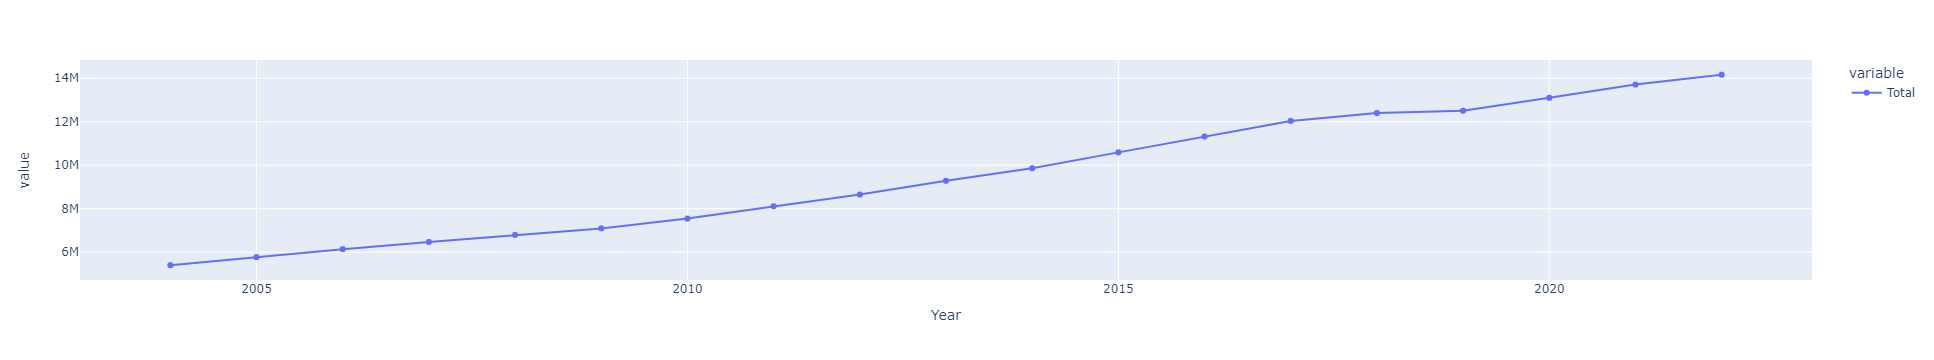

In [ ]:
# Total veriyi farklı bir şekilde kayıt edip yıllara göre araç artış sayısına bakıyorum.
total_df = pd.DataFrame(df["Total"])
fig = px.line(total_df, markers="0")
fig.show()

<AxesSubplot:xlabel='Year'>

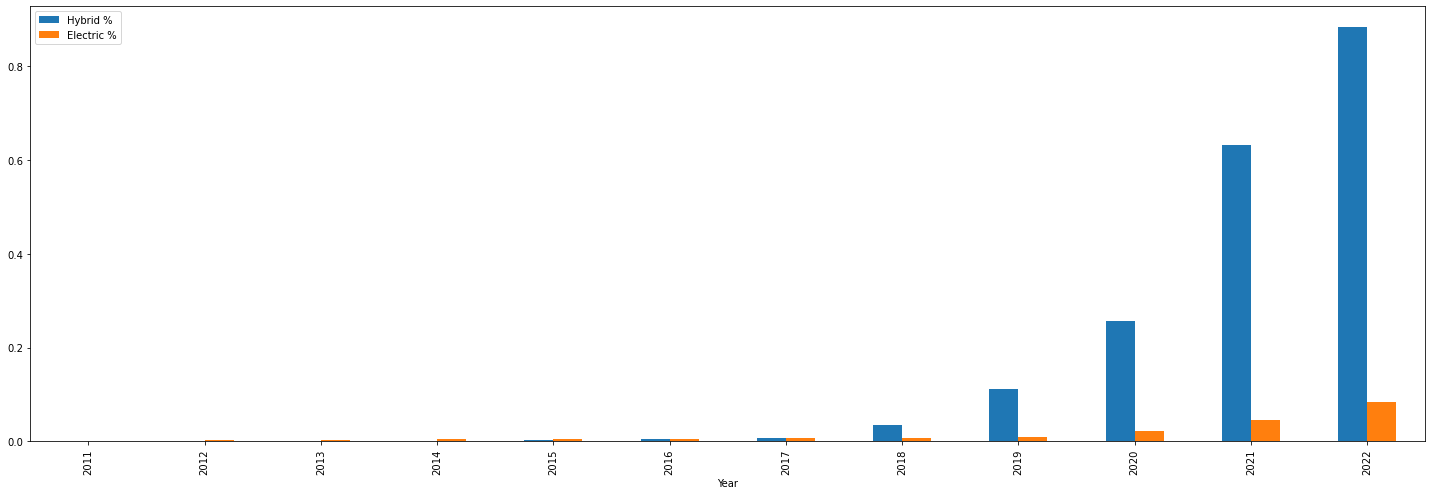

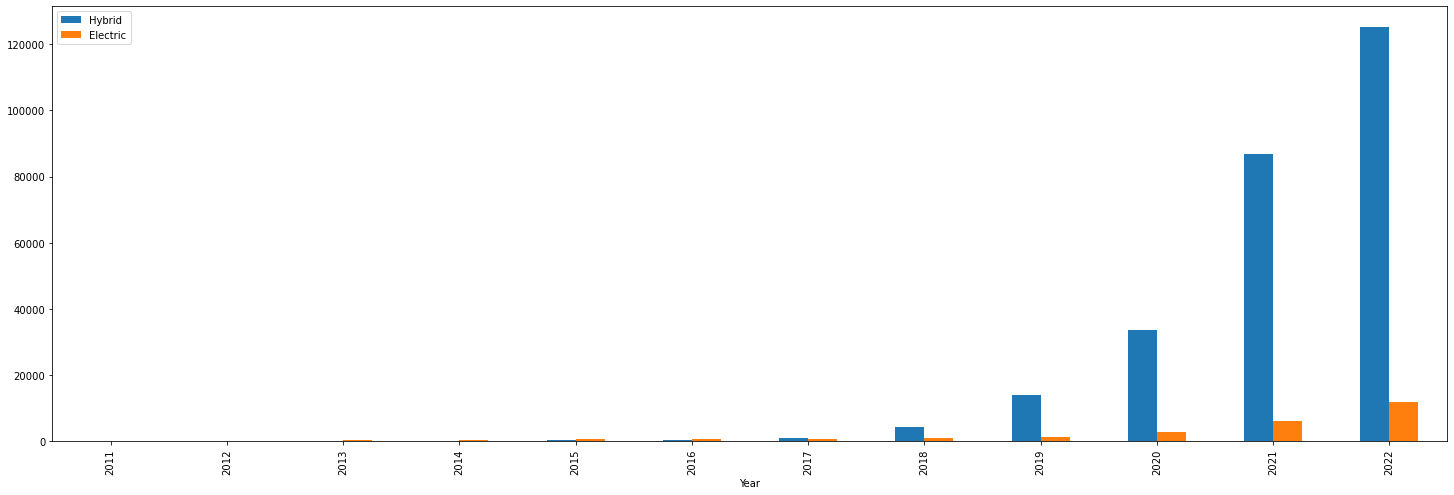

In [ ]:
# Elektrik ve hybrid araçların sayıları diğerlerine göre çok az olduğu için diğer grafiklerin içinde kayboluyordu. Bu iki veriyi farklı şekilde kayıt edip görselleştirdim
eleHybDf = df.iloc[7:,7:11]
eleHybDf.iloc[:,1:5:2].plot(kind="bar", figsize=(25,8))
eleHybDf.iloc[:,0:5:2].plot(kind="bar", figsize=(25,8))

# Yorum
1. **2011 - 2017 yılları arasında iki araç türünde benzer satışlar olmasına rağmen 2018 yılından sonra özellikle hybrid araçların satışı hız kazanmıştır.**

In [ ]:
values

Electric      11780.0
Hybrid       125159.0
LPG         4985916.0
Diesel      5240432.0
Gasoline    3758770.0
Name: 2022, dtype: float64

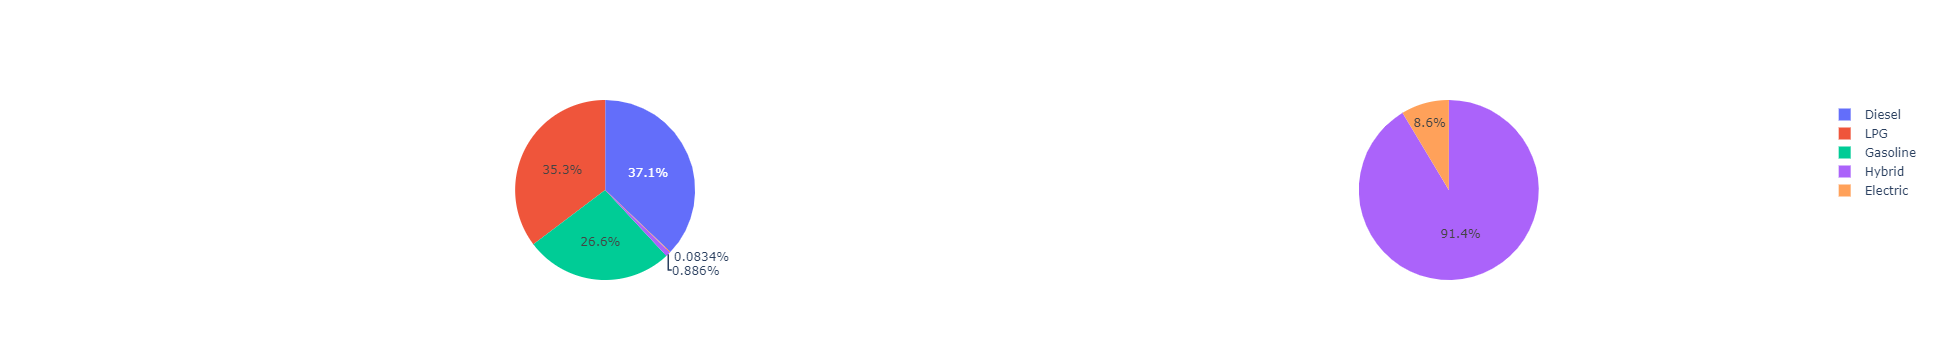

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
values =df.iloc[-1][["Electric","Hybrid","LPG","Diesel","Gasoline"]]
values2 = df.iloc[-1][["Electric","Hybrid"]]
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=["Electric","Hybrid","LPG","Diesel","Gasoline"],values=values, name="Car Dist"),1, 1)
fig.add_trace(go.Pie(labels=["Electric","Hybrid"], values=values2, name="Car Dist"),1, 2)
fig.show()

# Pie grafik yorumlama
1. Bütün araç çeşitlerinden 2022 yılında **%37.1**'i dizel, **%35,3**'ü ise LPG yakıtını kulanan araçlardır.
2. **%0.88**'i hibrid iken **%0.083**'ü ise elektriklidir. 
3. Elektrik ve hibrid araçlarının kendi aralarındaki oran ise **%91,4**'e **%8.6**'dır.

# Bar Grafiği ile yakıtlarına göre araçların yıllar içindeki değişimi görülmektedir. 
1. 2017 - 2018 yılları arasında araçların satışında bir duruksama olduğu görülmekte fakat 2020 yılından sonra yeniden araç satışlarında yükselme trendi görülmektedir.
2. ilk yıllarda bilinmeyen diye veri girişleri olmuş olsa da son yıllarda bu veri girişi giderek azalmaktadır.

In [ ]:
def pbar(variable):
    fig, ax = plt.subplots(figsize=(10,5))
    df[variable].plot(kind="bar")
    ax.set_xlabel("Year")
    plt.title(variable)
    ax.legend(df)
    plt.show()

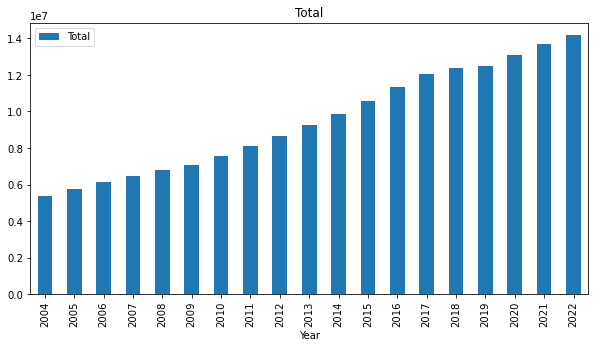

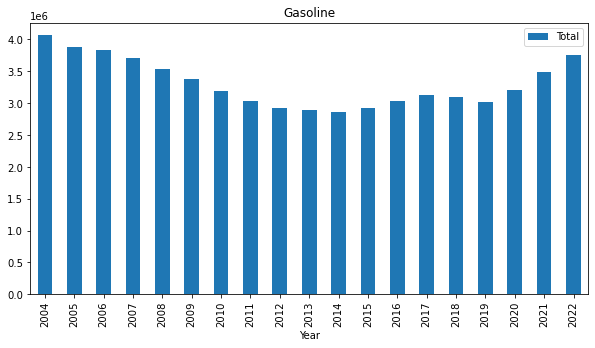

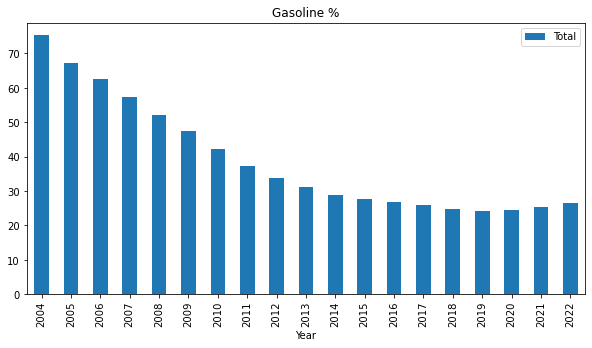

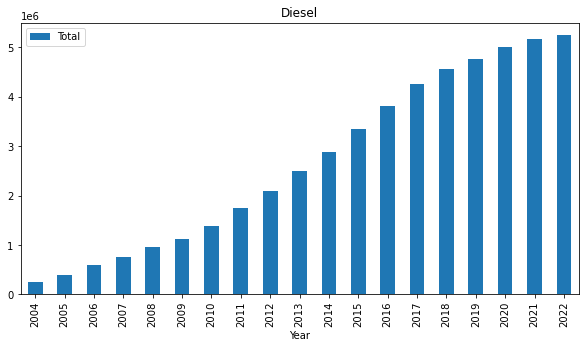

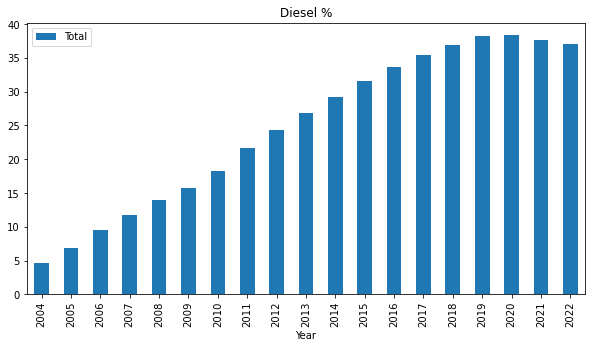

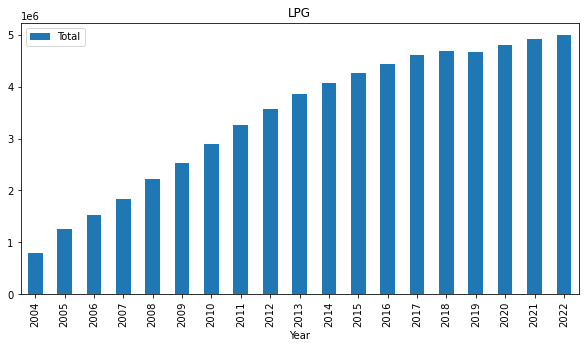

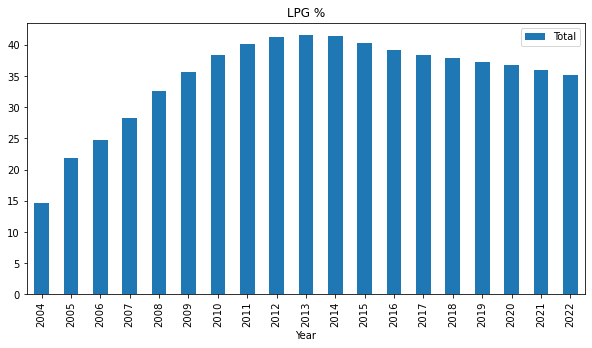

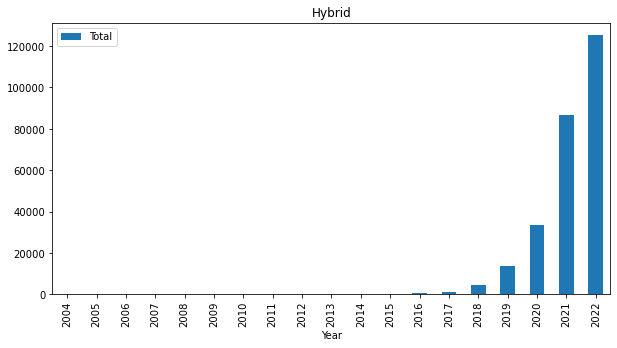

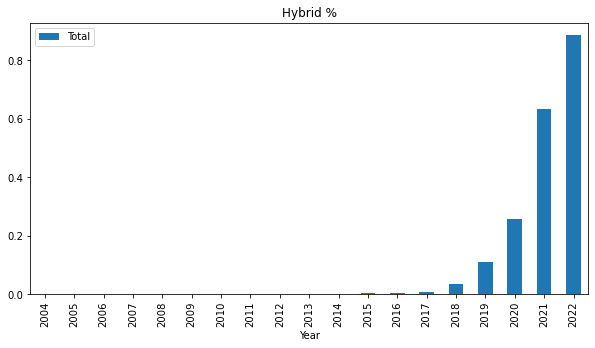

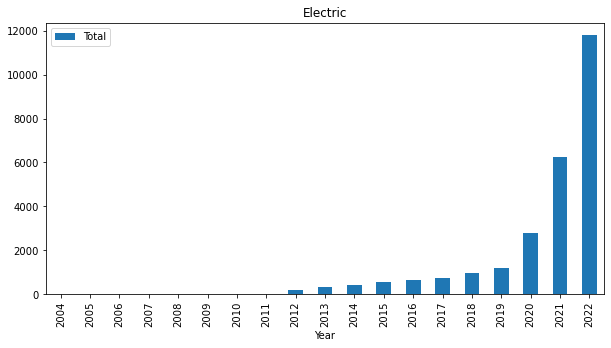

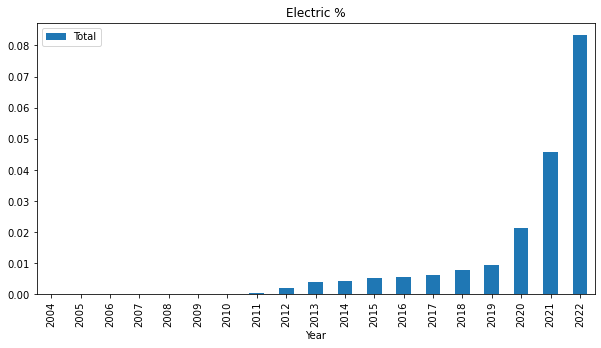

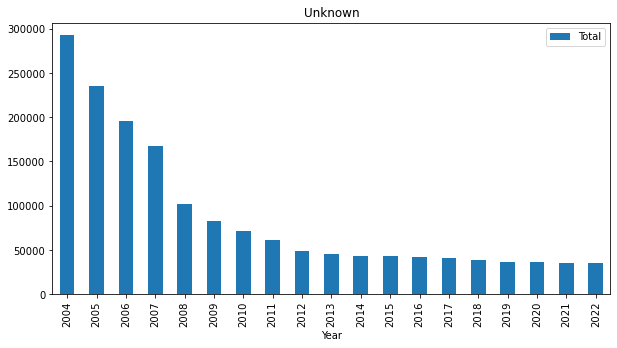

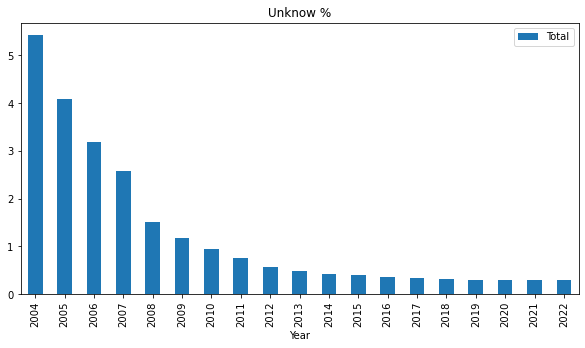

In [ ]:
for i in df:
    pbar(i)

# Çizgi grafigi
1. **Benzinli** araçların yıllara göre azaldığını grafiğimizde de görebiliyoruz. Fakat **2019** yılından sonra **benzinli** araçlarda bir artış gözlemliyoruz
2. **LPG**'li araçlar **2010** yılının ortasında **benzinli** araçların sayısını geçmiştir. 
3. **Dizel** araçlar ise **2014** yılında **benzinli** araç sayısında satışı olurken sonrasında **benzinli** araçları geçmiştir. 
4. **2018** yılının ortasından sonra **dizel** araçların satışı **LPG**'li araçların satışını geçmiştir. 

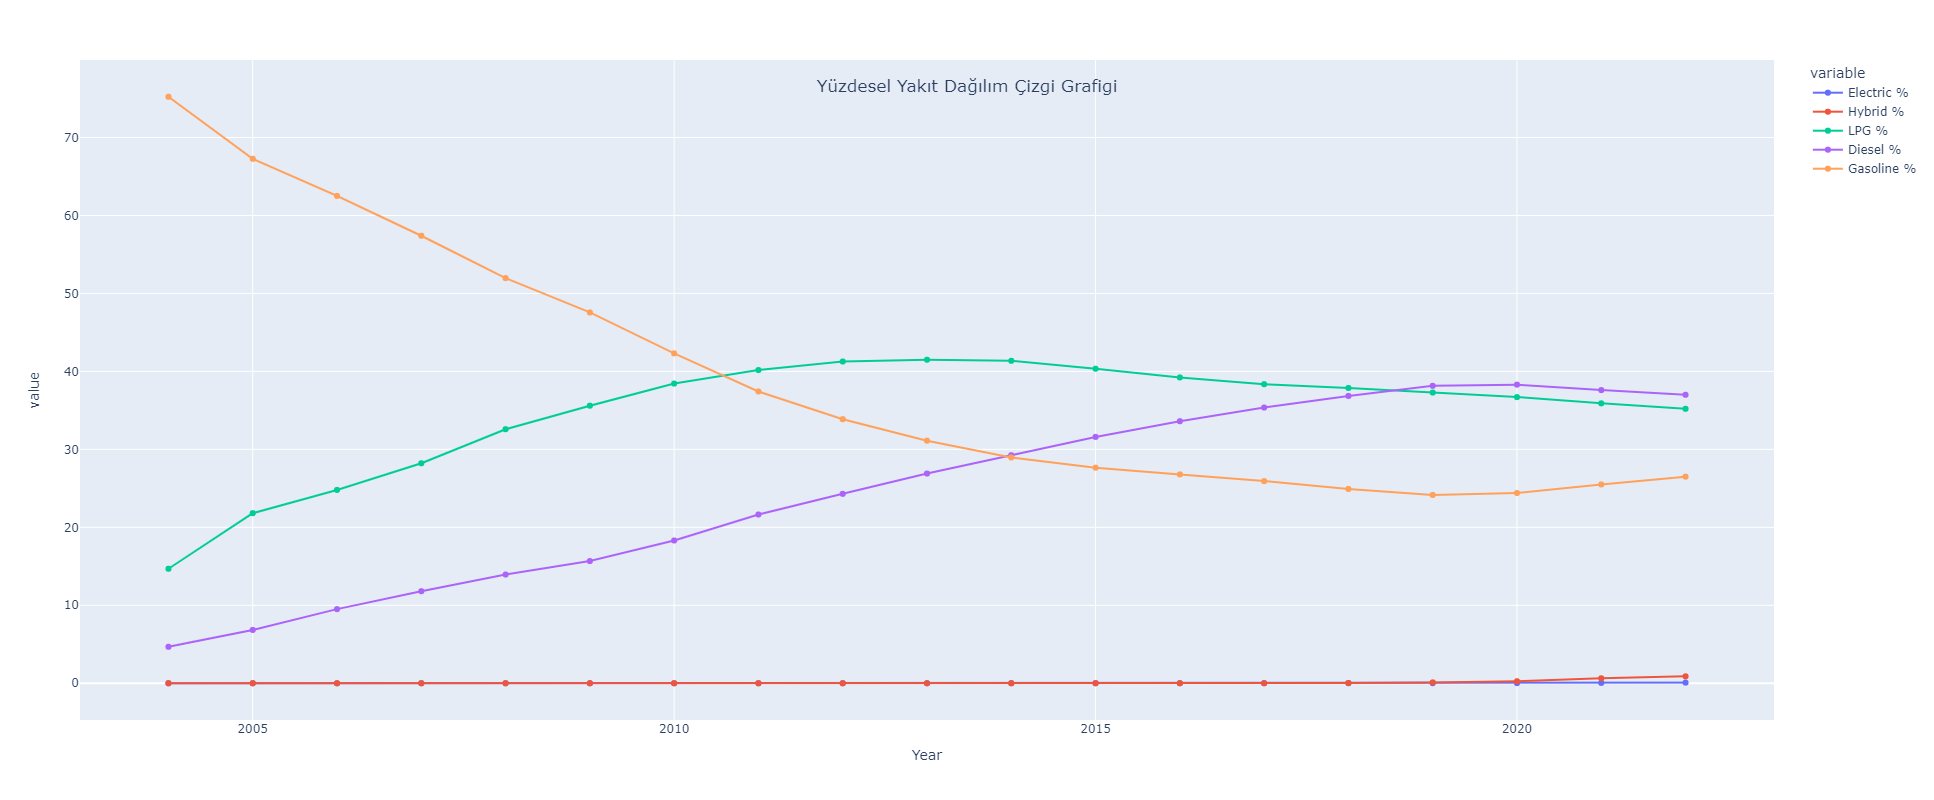

In [ ]:
fig = px.line(df[["Electric %","Hybrid %","LPG %","Diesel %","Gasoline %"]], height=800,markers="0")
fig.update_layout( title={'text':"Yüzdesel Yakıt Dağılım Çizgi Grafigi", 'y':0.9,'x':0.5,'xanchor':'center','yanchor':'top'})
fig.show()

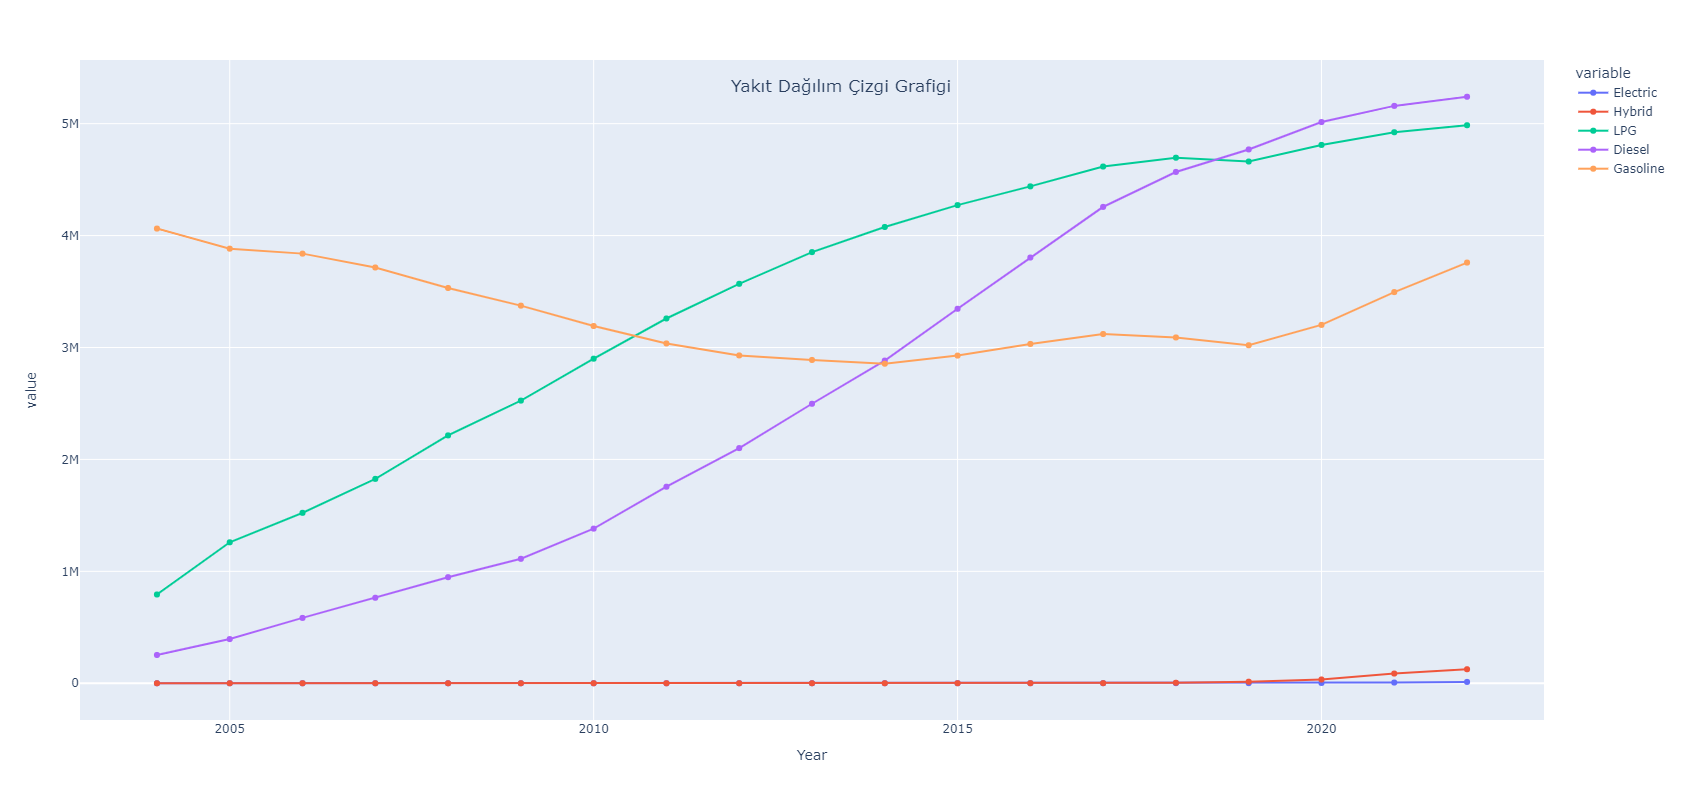

In [ ]:
fig = px.line(df[["Electric","Hybrid","LPG","Diesel","Gasoline"]], height=800, markers="x")
fig.update_layout( title={'text':"Yakıt Dağılım Çizgi Grafigi", 'y':0.9,'x':0.5,'xanchor':'center','yanchor':'top'})
fig.show()

# Hazırlayan Mehmet Ali YILMAZ